In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("googleplaystore.csv")

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# how much data i have in this csv file 
df.shape
# 10841 rows 
# 13 columns in our data 

(10841, 13)

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
# null value in our dataframe 
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# data cleaning

In [8]:
# correcting datatype of columns 
# remove missing values 
# remove null values 
# delete column which contains more than 90% record null 
# correct values of the columns as per datatype 

In [9]:
# size column is basically continuous column so its datatype must be either int or float 
# but in size column size is given into mb,kg,gb rather than into bytes format 
# along with that they have written size of application like numm,numk type format 
# so i need to make my data machine learniable machine can not understand kb,mb kind stuff so i will convert 
# size column into byte columns and also change it's datatype into numeric datatype 

In [10]:
#so lets write one function which convert kb,mb
def convert_size_byte(size):
    if size == 'Varies with device': return np.nan
    unit =size[-1] # last element of string which may be m,k
    
    if unit=='M':
        return float(size[:-1])*1024*1024 
    elif unit =='K':
        return float(size[:-1])*1024

In [11]:
'''lets call above function to change values and datype of size column '''
df['Size']=pd.to_numeric(df['Size'].apply(convert_size_byte),errors="coerce")

In [12]:
# size is converted into byte 
df['Size'].head()

0    19922944.0
1    14680064.0
2     9122611.2
3    26214400.0
4     2936012.8
Name: Size, dtype: float64

In [13]:
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')

In [14]:
df['Installs']=pd.to_numeric(df['Installs'].str.replace('+','').str.replace(',', ''), errors='coerce')

In [15]:
df["Price"]=pd.to_numeric(df['Price'].apply(lambda x:x.replace('$','') if '$' in x else x),errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            8829 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


In [17]:
# null value in our dataframe 
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              1
Size              2012
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [18]:
print("average Rating using mean => ",df['Rating'].mean())
print("average Rating using median => ",df['Rating'].median())

average Rating using mean =>  4.193338315362448
average Rating using median =>  4.3


In [19]:
# missing value treatment for Rating
df["Rating"].fillna(df["Rating"].mean(),inplace=True)
# missing value treatment for Reviews
df["Reviews"].fillna(df["Reviews"].mean(),inplace=True)
# missing value treatment for Size
df["Size"].fillna(df["Size"].mean(),inplace=True)
# missing value treatment for Installs
df["Installs"].fillna(df["Installs"].mean(),inplace=True)


df["Price"].fillna(df["Price"].mean(),inplace=True)

In [20]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [21]:
gplay_num=df.select_dtypes(['int64','float64'])

In [22]:
'''
# make the function for null value treatment
def miss_value_treatment():
    for i in gplay_num:
        df[i].fillna(df[i].mean(),inplace=True)
        '''

'\n# make the function for null value treatment\ndef miss_value_treatment():\n    for i in gplay_num:\n        df[i].fillna(df[i].mean(),inplace=True)\n        '

In [23]:
# miss_value_treatment()  #apply the function

In [24]:
gplay_num.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price'], dtype='object')

In [25]:
gplay_cat=df.select_dtypes(['object'])

In [26]:
gplay_num.isnull().sum()

Rating      0
Reviews     0
Size        0
Installs    0
Price       0
dtype: int64

In [27]:
gplay_cat.columns

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [28]:
gplay_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10841 non-null  object
 1   Category        10841 non-null  object
 2   Type            10840 non-null  object
 3   Content Rating  10840 non-null  object
 4   Genres          10841 non-null  object
 5   Last Updated    10841 non-null  object
 6   Current Ver     10833 non-null  object
 7   Android Ver     10838 non-null  object
dtypes: object(8)
memory usage: 677.7+ KB


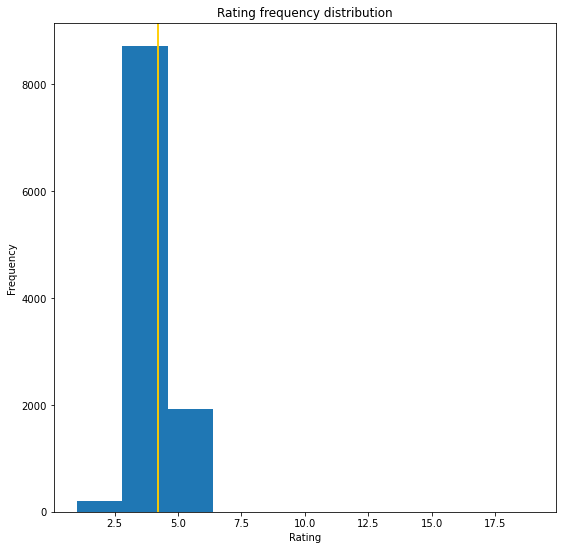

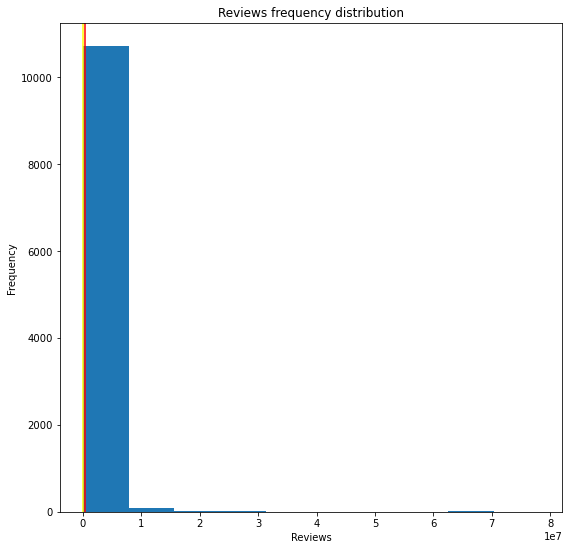

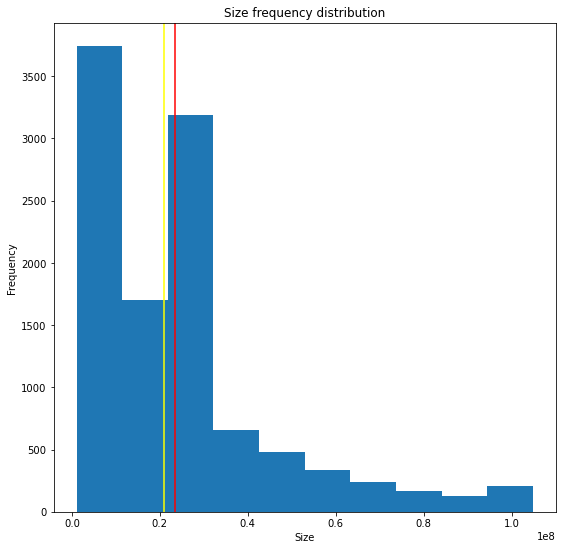

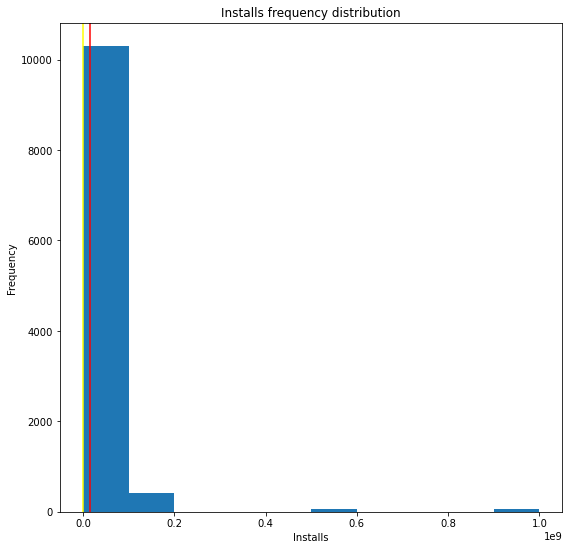

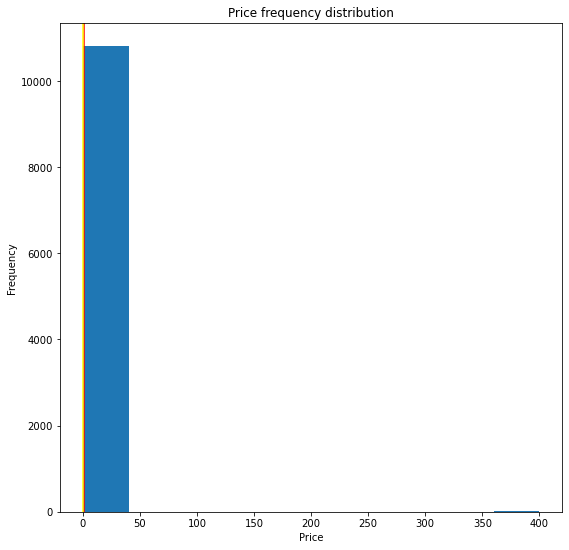

In [29]:
# univariate normal distribution data analysis 
for i in gplay_num:
    plt.figure(figsize=(9,9))
    plt.hist(df[i],bins=10)
    plt.title("{} frequency distribution".format(i))
    plt.axvline(df[i].mean(),color="red")
    plt.axvline(df[i].median(),color="yellow")
    plt.ylabel("Frequency")
    plt.xlabel(i)
    plt.show()

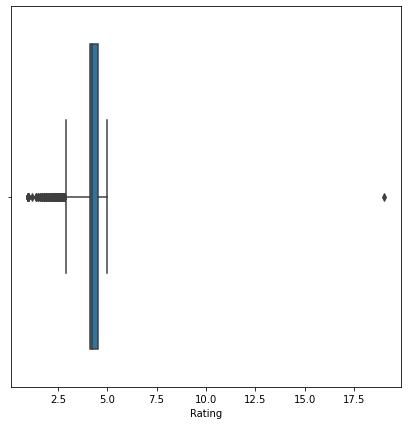

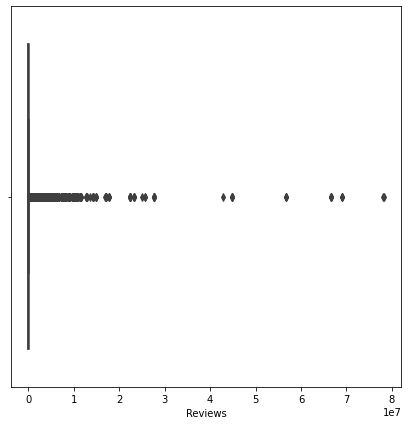

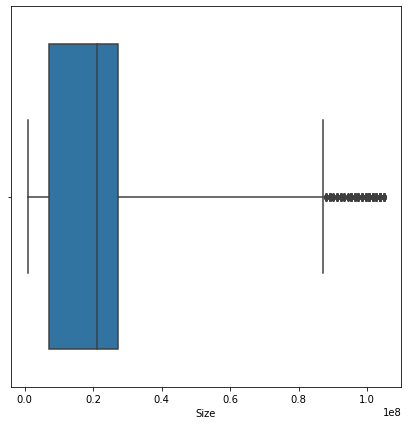

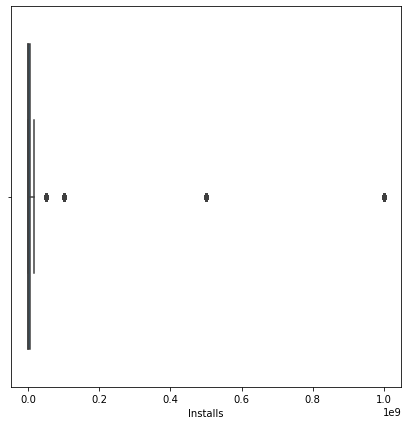

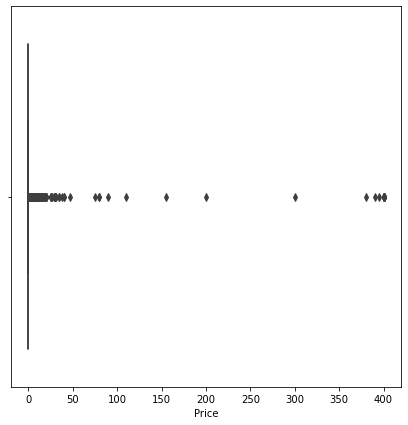

In [30]:
for i in gplay_num:
    plt.figure(figsize=(7,7))
    sns.boxplot(data=gplay_num,x=i,whis=3) #whis value is not gievn then whis default value is 1.5
    # upper whisker = q3+1.5*IQR
    # lower whisker = q1 - 1.5*IQR 
    # boxplot will calculate upper whisker and lower whisker by it's own and the nit will plot the box
    plt.show()

In [31]:
# Rating Column Outlier Treatment 
q1=np.quantile(gplay_num["Rating"],0.25)
q3=np.quantile(gplay_num["Rating"],0.75)
iqr=q3-q1

In [32]:
print("Quantile1 for  price is => ",q1)
print("Quantile3 for  price is => ",q3)
print("IQR for Price column is => ",iqr)

Quantile1 for  price is =>  4.1
Quantile3 for  price is =>  4.5
IQR for Price column is =>  0.40000000000000036


In [33]:
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

upper whisker with 3 penalty is =>  5.700000000000001


In [34]:
gplay_num.shape

(10841, 5)

In [35]:
# accept all those records which come below given whisker values
gplay_num=gplay_num[gplay_num["Rating"]<up_whs]

In [36]:
gplay_num.shape

(10840, 5)

In [37]:
# Reviews Column Outlier Treatment 
q1=np.quantile(gplay_num["Reviews"],0.25)
q3=np.quantile(gplay_num["Reviews"],0.75)
iqr=q3-q1
print("Quantile1 for  Reviews is => ",q1)
print("Quantile3 for  Reviews is => ",q3)
print("IQR for Reviews column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

Quantile1 for  Reviews is =>  38.0
Quantile3 for  Reviews is =>  54775.5
IQR for Reviews column is =>  54737.5
upper whisker with 3 penalty is =>  218988.0


In [38]:
gplay_num.shape

(10840, 5)

In [39]:
# accept all those records which come below given whisker values
gplay_num=gplay_num[gplay_num["Reviews"]<up_whs]

In [40]:
gplay_num.shape

(9265, 5)

In [41]:
# Size Column Outlier Treatment 
q1=np.quantile(gplay_num["Size"],0.25)
q3=np.quantile(gplay_num["Size"],0.75)
iqr=q3-q1
print("Quantile1 for Size is => ",q1)
print("Quantile3 for Size is => ",q3)
print("IQR for Size column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

Quantile1 for Size is =>  6081740.8
Quantile3 for Size is =>  25165824.0
IQR for Size column is =>  19084083.2
upper whisker with 3 penalty is =>  82418073.6


In [42]:
gplay_num.shape

(9265, 5)

In [43]:
# accept all those records which come below given whisker values
gplay_num=gplay_num[gplay_num["Size"]<up_whs]

In [44]:
gplay_num.shape

(9022, 5)

In [45]:
# Installs Column Outlier Treatment 
q1=np.quantile(gplay_num["Installs"],0.25)
q3=np.quantile(gplay_num["Installs"],0.75)
iqr=q3-q1
print("Quantile1 for Installs is => ",q1)
print("Quantile3 for Installs is => ",q3)
print("IQR for Installs column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

Quantile1 for Installs is =>  1000.0
Quantile3 for Installs is =>  1000000.0
IQR for Installs column is =>  999000.0
upper whisker with 3 penalty is =>  3997000.0


In [46]:
gplay_num.shape

(9022, 5)

In [47]:
# accept all those records which come below given whisker values
gplay_num=gplay_num[gplay_num["Installs"]<up_whs]
gplay_num.shape

(7809, 5)

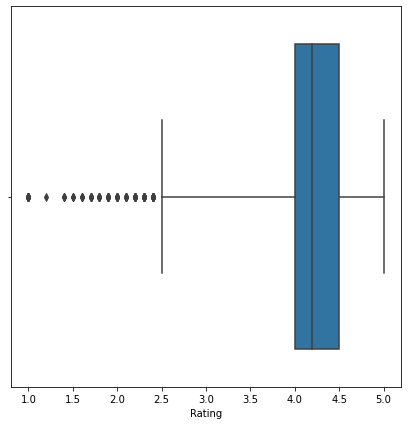

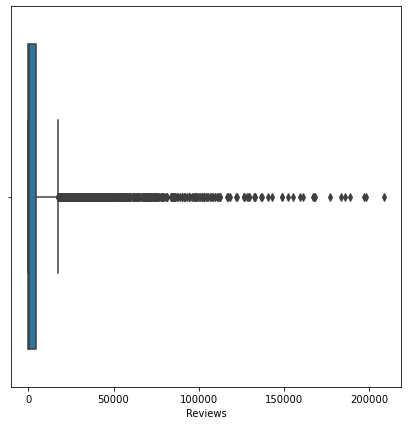

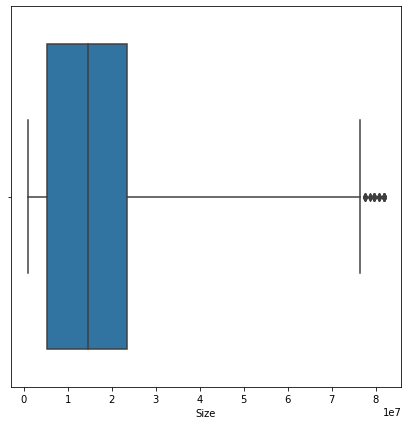

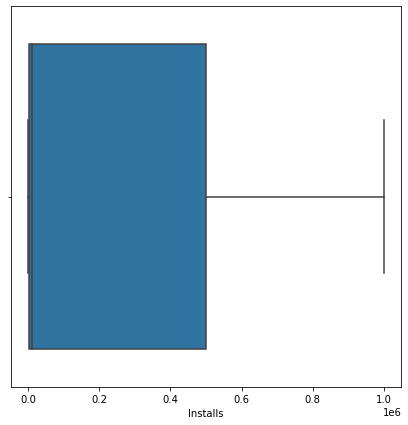

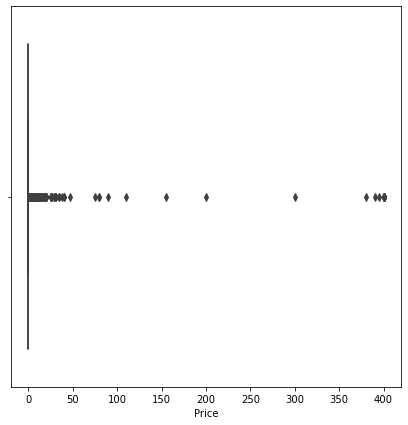

In [48]:
for i in gplay_num:
    plt.figure(figsize=(7,7))
    sns.boxplot(data=gplay_num,x=i,whis=3) #whis value is not gievn then whis default value is 1.5
    # upper whisker = q3+1.5*IQR
    # lower whisker = q1 - 1.5*IQR 
    # boxplot will calculate upper whisker and lower whisker by it's own and the nit will plot the box
    plt.show()

In [49]:
from scipy.stats import skew

In [50]:
for i in gplay_num:
    print(i,skew(gplay_num[i]))

Rating -1.7831152732148448
Reviews 4.454923927107767
Size 1.387727795329538
Installs 1.2972725672513523
Price 20.119926132965233


Rating -1.7831152732148448


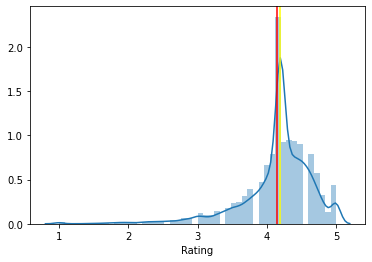

Reviews 4.454923927107767


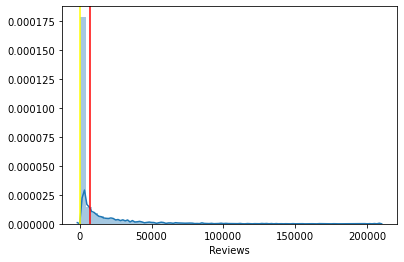

Size 1.387727795329538


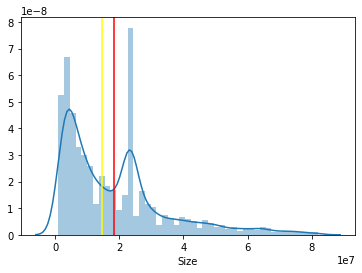

Installs 1.2972725672513523


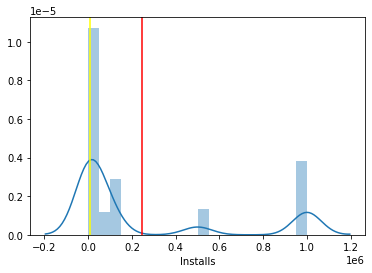

Price 20.119926132965233


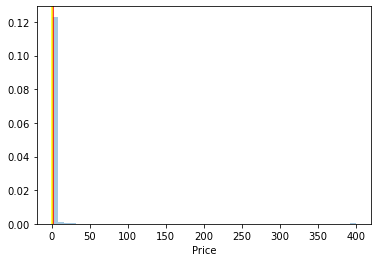

In [51]:
for col in gplay_num:
    print(col,skew(gplay_num[col]))
    plt.figure()
    sns.distplot(gplay_num[col])
    plt.axvline(gplay_num[col].mean(),color="red")
    plt.axvline(gplay_num[col].median(),color="yellow")
    plt.show()

In [52]:
# the columns which skewness values is >=1 and <= -1 those columns skewness we will reduce 
gplay_num_sqrt=gplay_num.copy()
for col in gplay_num_sqrt:
    if skew(gplay_num_sqrt[col]) >=1 or skew(gplay_num_sqrt[col])<=-1:
        gplay_num_sqrt[col]=np.sqrt(gplay_num_sqrt[col])

Rating -1.7831152732148448


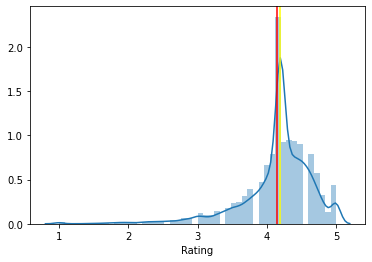

Reviews 4.454923927107767


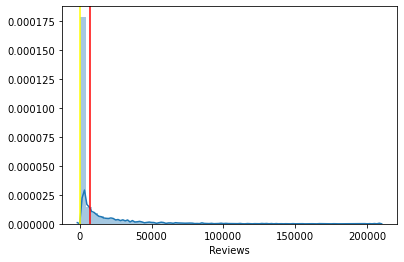

Size 1.387727795329538


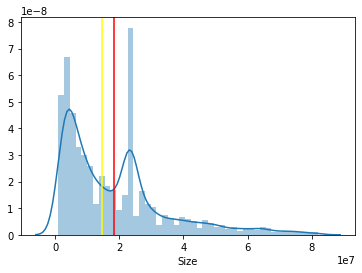

Installs 1.2972725672513523


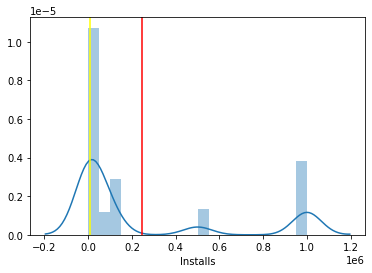

Price 20.119926132965233


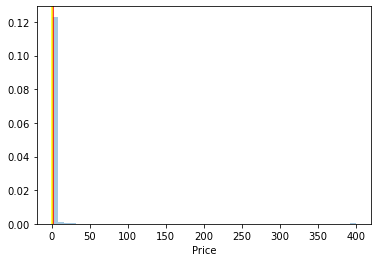

In [53]:
for col in gplay_num:
    print(col,skew(gplay_num[col]))
    plt.figure()
    sns.distplot(gplay_num[col])
    plt.axvline(gplay_num[col].mean(),color="red")
    plt.axvline(gplay_num[col].median(),color="yellow")
    plt.show()

In [54]:
gplay_num_minmaxscale=gplay_num.copy()

In [55]:
gplay_num_minmaxscale

,Rating,Reviews,Size,Installs,Price
0,4.100000,159.0,1.992294e+07,10000.0,0.0
1,3.900000,967.0,1.468006e+07,500000.0,0.0
4,4.300000,967.0,2.936013e+06,100000.0,0.0
5,4.400000,167.0,5.872026e+06,50000.0,0.0
6,3.800000,178.0,1.992294e+07,50000.0,0.0
...,...,...,...,...,...
10835,4.193338,0.0,1.006633e+07,10.0,0.0
10836,4.500000,38.0,5.557453e+07,5000.0,0.0
10837,5.000000,4.0,3.774874e+06,100.0,0.0
10838,4.193338,3.0,9.961472e+06,1000.0,0.0


In [56]:
from sklearn.preprocessing  import MinMaxScaler
scaler=MinMaxScaler()

# it always return series but i need dataframe 
# house_num_minmaxscale =scaler.fit_transform(house_num_minmaxscale)
# dataframe 
gplay_num_minmaxscale = pd.DataFrame(scaler.fit_transform(gplay_num_minmaxscale.values),
                                     columns=gplay_num_minmaxscale.columns,
                                     index=gplay_num_minmaxscale.index)

In [57]:
gplay_num_minmaxscale

,Rating,Reviews,Size,Installs,Price
0,0.775000,0.000763,0.233766,0.01000,0.0
1,0.725000,0.004638,0.168831,0.50000,0.0
4,0.825000,0.004638,0.023377,0.10000,0.0
5,0.850000,0.000801,0.059740,0.05000,0.0
6,0.700000,0.000854,0.233766,0.05000,0.0
...,...,...,...,...,...
10835,0.798335,0.000000,0.111688,0.00001,0.0
10836,0.875000,0.000182,0.675325,0.00500,0.0
10837,1.000000,0.000019,0.033766,0.00010,0.0
10838,0.798335,0.000014,0.110390,0.00100,0.0


In [58]:
gplay_num_sqrt

,Rating,Reviews,Size,Installs,Price
0,2.024846,12.609520,4463.512518,100.000000,0.0
1,1.974842,31.096624,3831.457164,707.106781,0.0
4,2.073644,31.096624,1713.479734,316.227766,0.0
5,2.097618,12.922848,2423.226279,223.606798,0.0
6,1.949359,13.341664,4463.512518,223.606798,0.0
...,...,...,...,...,...
10835,2.047764,0.000000,3172.747957,3.162278,0.0
10836,2.121320,6.164414,7454.832527,70.710678,0.0
10837,2.236068,2.000000,1942.903394,10.000000,0.0
10838,2.047764,1.732051,3156.179970,31.622777,0.0


Rating -1.7831152732148448


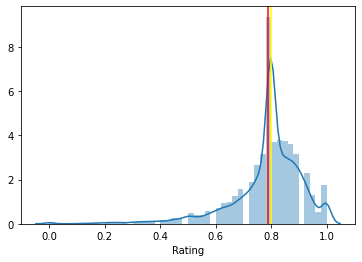

Reviews 4.4549239271077665


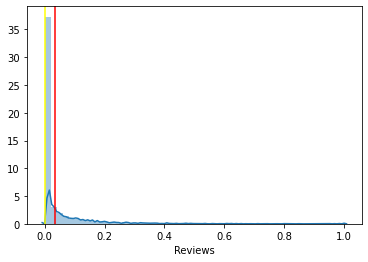

Size 1.387727795329538


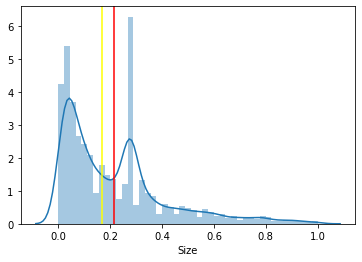

Installs 1.2972725672513528


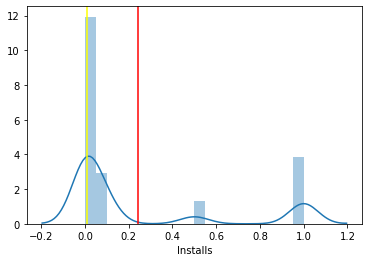

Price 20.119926132965226


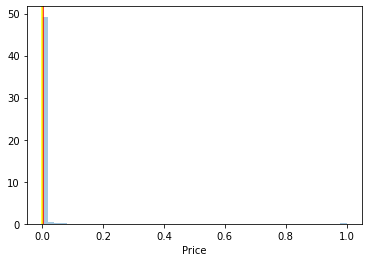

In [59]:
for col in gplay_num_minmaxscale:
    print(col,skew(gplay_num_minmaxscale[col]))
    plt.figure()
    sns.distplot(gplay_num_minmaxscale[col])
    plt.axvline(gplay_num_minmaxscale[col].mean(),color="red")
    plt.axvline(gplay_num_minmaxscale[col].median(),color="yellow")
    plt.show()

In [60]:
for i in gplay_num_minmaxscale:
    print(i,skew(gplay_num_minmaxscale[i]))

Rating -1.7831152732148448
Reviews 4.4549239271077665
Size 1.387727795329538
Installs 1.2972725672513528
Price 20.119926132965226


In [61]:
gplay_cat

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [62]:
gplay_cat.drop(['Last Updated'],axis=1,inplace=True)
gplay_cat.drop(['Current Ver'],axis=1,inplace=True)
gplay_cat.drop(['Android Ver'],axis=1,inplace=True)

In [63]:
# univate analysis 
gplay_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10841 non-null  object
 1   Category        10841 non-null  object
 2   Type            10840 non-null  object
 3   Content Rating  10840 non-null  object
 4   Genres          10841 non-null  object
dtypes: object(5)
memory usage: 423.6+ KB


In [64]:
gplay_cat

,App,Category,Type,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity
...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference


In [65]:
# univariate analysis for categorical columns using value_counts()
# it will help me to count category and its number of records 
len(gplay_cat['App'].value_counts()) # nominal

9660

In [66]:
# feature App have 25 categories 
gplay_cat['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
8 Ball Pool                                          7
Duolingo: Learn Languages Free                       7
ESPN                                                 7
                                                    ..
FJ WiFi HDD                                          1
Sporting CP Keyboard Theme                           1
Wireless news                                        1
Pool Billiards Classic - bi a                        1
ZOMBIE RIPPER                                        1
Name: App, Length: 9660, dtype: int64

In [67]:
gplay_cat['App'].unique

<bound method Series.unique of 0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 10841, dtype: object>

In [68]:
# univariate analysis for categorical columns using value_counts()
# it will help me to count category and its number of records 
len(gplay_cat['Category'].value_counts()) # nominal

34

In [69]:
# feature App have 25 categories 
gplay_cat['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

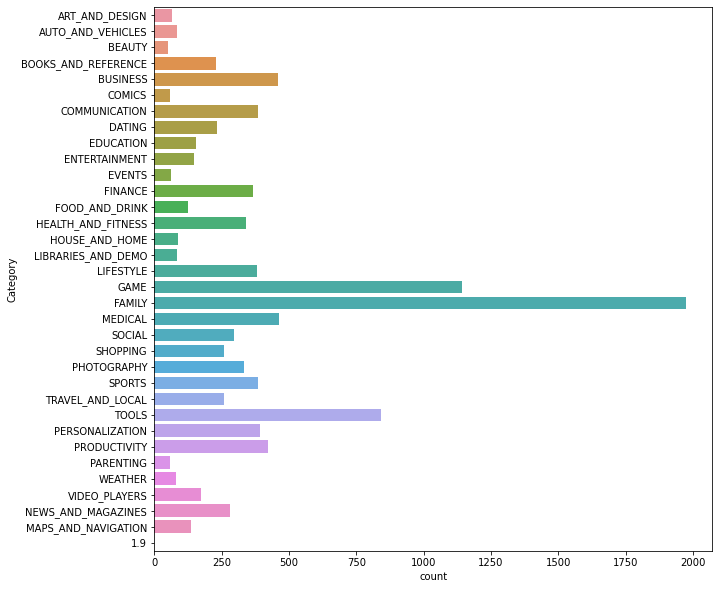

In [70]:
#countplot univariate graphical analysis 
plt.figure(figsize=(10,10))
sns.countplot(data=gplay_cat,y="Category")
plt.show()

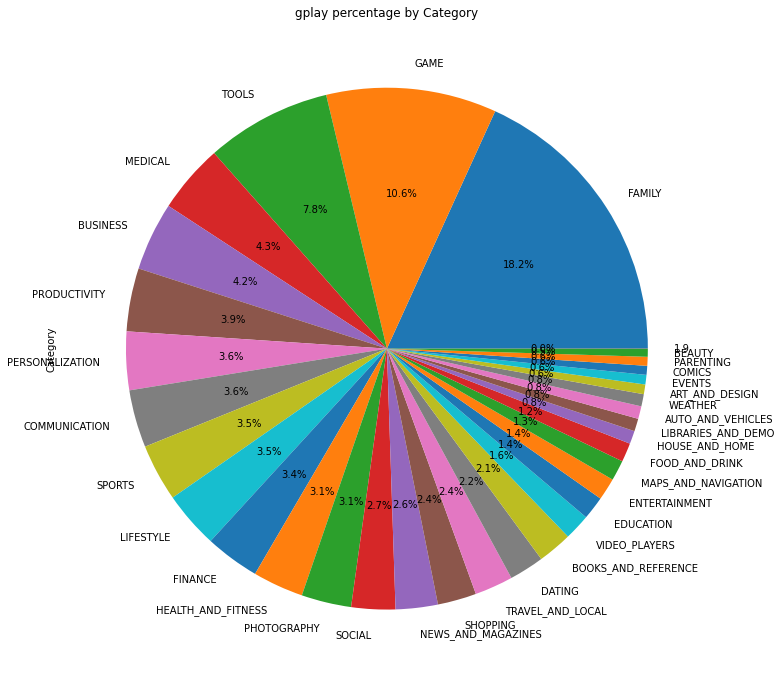

In [71]:
# graphical analysis on categorical column Category data share percentage 
# using pie plot 
plt.figure(figsize=(12,12))
gplay_cat['Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("gplay percentage by Category")
plt.show()

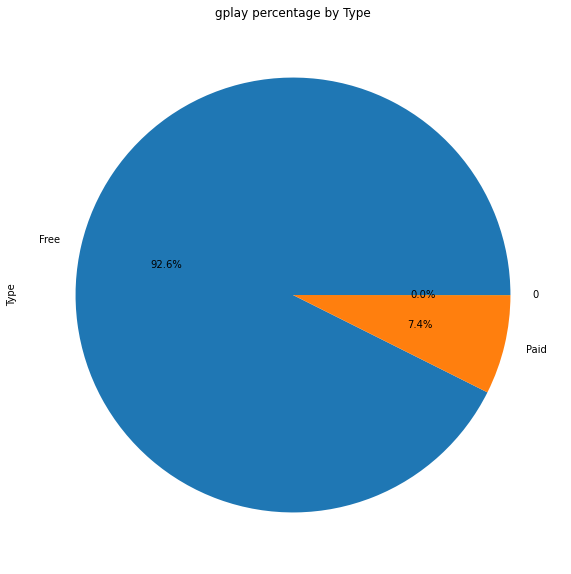

In [72]:
# graphical analysis on categorical column Type data share percentage 
# using pie plot 
plt.figure(figsize=(10,10))
gplay_cat['Type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("gplay percentage by Type")
plt.show()

In [73]:
gplay_cat.columns

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres'], dtype='object')

In [74]:
gplay_cat

,App,Category,Type,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity
...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference


In [75]:
gplay_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10841 non-null  object
 1   Category        10841 non-null  object
 2   Type            10840 non-null  object
 3   Content Rating  10840 non-null  object
 4   Genres          10841 non-null  object
dtypes: object(5)
memory usage: 423.6+ KB


In [76]:
# so 5 category is given and i am applying one-hot encoding 
#dummymsz=pd.get_dummies(gplay_cat["App"])
#dummyn=pd.get_dummies(gplay_cat["Category"])

In [77]:
#dummymsz

In [78]:
#dummyn

In [79]:
from sklearn.preprocessing import LabelEncoder 

In [80]:
gplay_cat.columns

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres'], dtype='object')

In [81]:
#gplay_cat.drop(["App","Category"],axis=1,inplace=True)

In [82]:
gplay_cat.columns

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres'], dtype='object')

In [83]:
gplay_cat['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [84]:
gplay_cat['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [85]:
gplay_cat['Genres'].value_counts()

Tools                      842
Entertainment              623
Education                  549
Medical                    463
Business                   460
                          ... 
Trivia;Education             1
Strategy;Creativity          1
Entertainment;Education      1
Arcade;Pretend Play          1
Role Playing;Education       1
Name: Genres, Length: 120, dtype: int64

In [86]:
le=LabelEncoder()
for col in gplay_cat:
    gplay_cat[col]=le.fit_transform(gplay_cat[col])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']